# Project 1 implementation
### In this notebook, we will be implementing and visualising our answers to the different questions


In Mergesort, when the sizes of subarrays are small, the overhead of many recursive
calls makes the algorithm inefficient. Therefore, in real use, we often combine
Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better
efficiency. The idea is to set a small integer **S** as a threshold for the size of subarrays.
Once the size of a subarray in a recursive call of Mergesort is less than or equal to **S**,
the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

## (a) Algorithm implementation:
### Implement the above hybrid algorithm.
We will be implementing all 3 different types so that we can have a richer comparison between the different algorithms

In [1]:
# Import relevant libraries that we're going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
# Global variable to track comparisons
comparison_count = 0

In [3]:
# Below are the implementations of the different sorting algorithms

# Insertion sort implementation
def insertion_sort(arr, left, right):
    global comparison_count
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            comparison_count += 1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Helper function for mergesort and the hybrid approach
def merge(arr, left, mid, right):
    global comparison_count
    L = arr[left:mid + 1]
    R = arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < len(L) and j < len(R):
        comparison_count += 1  # Count comparison
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < len(L):
        arr[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        arr[k] = R[j]
        j += 1
        k += 1

# Normal mergesort implementation
def standard_merge_sort(arr, left, right):
    global comparison_count
    if left < right:
        mid = (left + right) // 2
        standard_merge_sort(arr, left, mid)
        standard_merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)

        
# Hyrbid mergesort implementation
def hybrid_merge_sort(arr, left, right, S):
    if left < right:
        if (right - left + 1) <= S:
            insertion_sort(arr, left, right)
        else:
            mid = (left + right) // 2
            hybrid_merge_sort(arr, left, mid, S)
            hybrid_merge_sort(arr, mid + 1, right, S)
            merge(arr, left, mid, right)


## (b) Generate input data: 
### Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.

In [4]:
# Experiment setup
input_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]
threshold_values = [5, 10, 20, 50, 100, 200, 500]
max_value = 100000

# Data to be stored and used for comparisons later
results_n = []
results_s = []
comparison_data = {"n": [], "S": [], "comparisons": [], "algorithm": []}

## (c) Analyze time complexity: 
### Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case. 

Before we continue, we need to do some of our own analysis of the theoretical time complexity of this sorting algorithm, our derivation of the best case, worst case and average case of the implementation is shown below

**Best Case:**
<br>
Since for both insertion sort and mergesort, the best case would occur when the array is already sorted, it would follow that in our hybrid approach, the best case would occur when the array is sorted as well.

**Worst Case:**
<br>
Since for both insertion sort and mergesort, the worst case would occur when the array is in a reversed-sorted manner, it would follow that in our hybrid approach, the worst case would occur when the array is reversed-sorted as well.

**Average Case:**
<br>
In the average case, we assume that the chances of getting each number in the array is equal

### (i) With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

In [5]:
# Running and retrieving data
for n in input_sizes:
    arr = np.random.randint(1, max_value, n)
    
    # Hybrid Merge Sort with S=100
    comparison_count = 0
    arr_copy = arr.copy()
    hybrid_merge_sort(arr_copy, 0, n - 1, S=100)
    comparison_data["n"].append(n)
    comparison_data["S"].append(100)
    comparison_data["comparisons"].append(comparison_count)
    comparison_data["algorithm"].append("Hybrid Merge Sort")

    # Standard Merge Sort
    comparison_count = 0
    arr_copy = arr.copy()
    standard_merge_sort(arr_copy, 0, n - 1)
    comparison_data["n"].append(n)
    comparison_data["S"].append(None)  # No S in standard merge sort
    comparison_data["comparisons"].append(comparison_count)
    comparison_data["algorithm"].append("Standard Merge Sort")

df = pd.DataFrame(comparison_data)

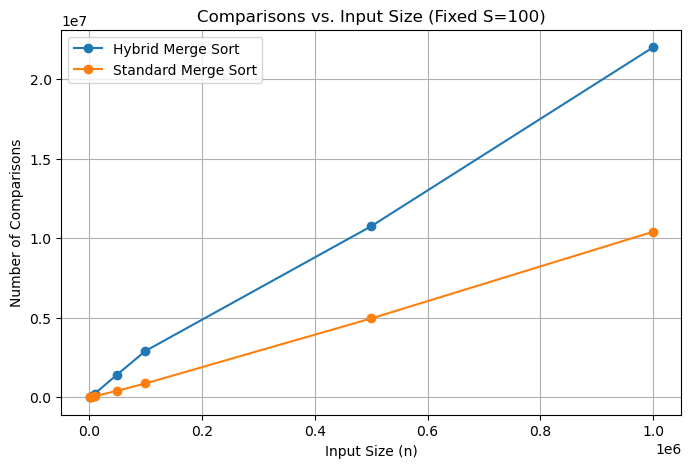

In [7]:
# Plot 1: Comparisons vs. Input Size (Fixed S)
plt.figure(figsize=(8, 5))
df_fixed_S = df[(df["S"] == 100) & (df["algorithm"] == "Hybrid Merge Sort")]
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"], marker='o', linestyle='-', label="Hybrid Merge Sort")
df_standard = df[df["algorithm"] == "Standard Merge Sort"]
plt.plot(df_standard["n"], df_standard["comparisons"], marker='o', linestyle='-', label="Standard Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Comparisons")
plt.title("Comparisons vs. Input Size (Fixed S=100)")
plt.legend()
plt.grid(True)
plt.show()

### (ii) With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

In [8]:
# Test Hybrid Merge Sort with different S values (fixed n=100000)
fixed_n = 100000
arr_fixed = np.random.randint(1, max_value, fixed_n)

for S in threshold_values:
    comparison_count = 0
    arr_copy = arr_fixed.copy()
    hybrid_merge_sort(arr_copy, 0, fixed_n - 1, S)
    comparison_data["n"].append(fixed_n)
    comparison_data["S"].append(S)
    comparison_data["comparisons"].append(comparison_count)
    comparison_data["algorithm"].append("Hybrid Merge Sort")

# Convert to DataFrame
df = pd.DataFrame(comparison_data)

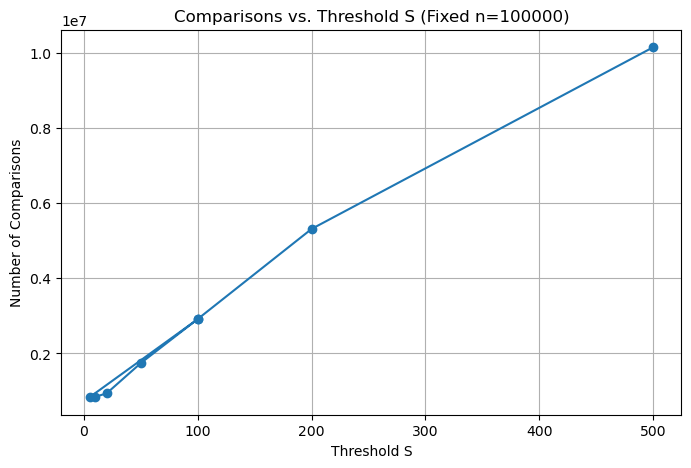

In [9]:
# Plot 2: Comparisons vs. Threshold (Fixed n)
plt.figure(figsize=(8, 5))
df_fixed_n = df[(df["n"] == fixed_n) & (df["algorithm"] == "Hybrid Merge Sort")]
plt.plot(df_fixed_n["S"], df_fixed_n["comparisons"], marker='o', linestyle='-')
plt.xlabel("Threshold S")
plt.ylabel("Number of Comparisons")
plt.title(f"Comparisons vs. Threshold S (Fixed n={fixed_n})")
plt.grid(True)
plt.show()

From the above, it looks like the optimal is somewhere near the start of the graph, with the graph showing an exploding trend for large values of S. Let's reduce our range from 1 to 10 to get a between 1 to 10

In [24]:
np.random.seed(10003)
arr_fixed = np.random.randint(1, max_value, fixed_n)
comparison_data1 = {"n": [], "S": [], "comparisons": [], "algorithm": []}
for S in range(1,11):
    comparison_count = 0
    arr_copy = arr_fixed.copy()
    hybrid_merge_sort(arr_copy, 0, fixed_n - 1, S)
    comparison_data1["n"].append(fixed_n)
    comparison_data1["S"].append(S)
    comparison_data1["comparisons"].append(comparison_count)
    comparison_data1["algorithm"].append("Hybrid Merge Sort")

# Convert to DataFrame
df = pd.DataFrame(comparison_data1)

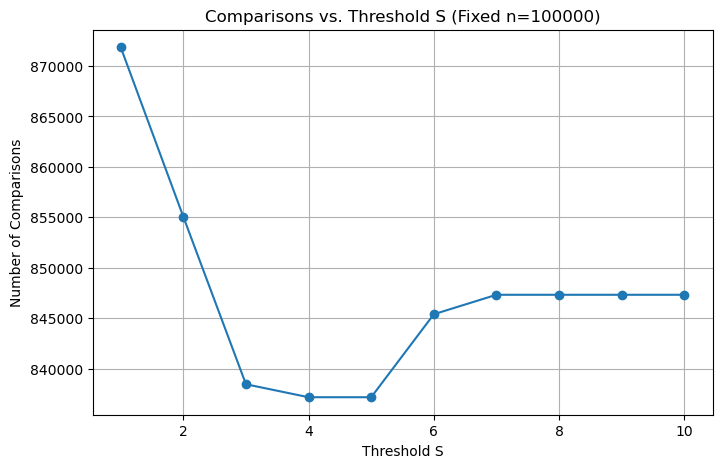

In [25]:
plt.figure(figsize=(8, 5))
df_fixed_n = df[(df["n"] == fixed_n) & (df["algorithm"] == "Hybrid Merge Sort")]
plt.plot(df_fixed_n["S"], df_fixed_n["comparisons"], marker='o', linestyle='-')
plt.xlabel("Threshold S")
plt.ylabel("Number of Comparisons")
plt.title(f"Comparisons vs. Threshold S (Fixed n={fixed_n})")
plt.grid(True)
plt.show()

In [26]:
comp_4 = df_fixed_n[df_fixed_n["S"] == 4]["comparisons"]
comp_5 = df_fixed_n[df_fixed_n["S"] == 5]["comparisons"]

minimum_S = int(comp_4.iloc[0]) - int(comp_5.iloc[0])
print("Difference in comparisons between S=4 and S=5:", minimum_S)

Difference in comparisons between S=4 and S=5: 0


From the above, it looks like the minimum value either 4 or 5, and as we can see for this implementation, it does not matter

### (iii)  Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

From our analyses on the algorithms above, we can derive a theoretical optimal value for S

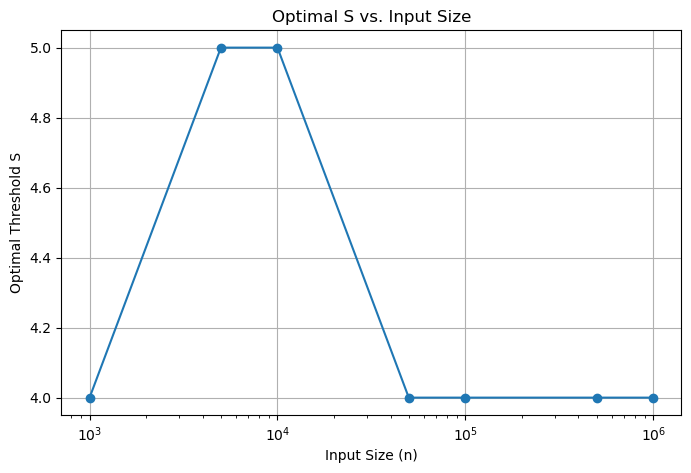

In [13]:
# Experiment setup
input_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000]  # Different n values
threshold_values = list(range(1, 21))  # Test S from 1 to 20
max_value = 100000

# Collect data
optimal_s_values = []

for n in input_sizes:
    arr_fixed = np.random.randint(1, max_value, n)
    comparison_data = {"S": [], "comparisons": []}

    for S in threshold_values:
        comparison_count = 0
        arr_copy = arr_fixed.copy()
        hybrid_merge_sort(arr_copy, 0, n - 1, S)
        comparison_data["S"].append(S)
        comparison_data["comparisons"].append(comparison_count)

    # Convert to DataFrame
    df_s = pd.DataFrame(comparison_data)

    # Find optimal S (minimum comparisons)
    optimal_S = df_s.loc[df_s["comparisons"].idxmin(), "S"]
    optimal_s_values.append(optimal_S)

# Plot Optimal S vs Input Size
plt.figure(figsize=(8, 5))
plt.plot(input_sizes, optimal_s_values, marker='o', linestyle='-')
plt.xlabel("Input Size (n)")
plt.ylabel("Optimal Threshold S")
plt.title("Optimal S vs. Input Size")
# Since the input values scale exponentially, we use a log scale for easier visualisation
plt.xscale("log")
plt.grid(True)
plt.show()

From the above, we can see that the empirical optimal value for S roughly centers around a size of 4.

## (d) Compare with original Mergesort: 
### Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [19]:
# Running and retrieving data
comparison_data2 = {"n": [], "S": [], "comparisons": [], "algorithm": []}
for n in input_sizes:
    arr = np.random.randint(1, max_value, n)
    
    # Hybrid Merge Sort with S=100
    comparison_count = 0
    arr_copy = arr.copy()
    hybrid_merge_sort(arr_copy, 0, n-1, S=4)
    comparison_data2["n"].append(n)
    comparison_data2["S"].append(4)
    comparison_data2["comparisons"].append(comparison_count)
    comparison_data2["algorithm"].append("Hybrid Merge Sort")

    # Standard Merge Sort
    comparison_count = 0
    arr_copy = arr.copy()
    standard_merge_sort(arr_copy, 0, n - 1)
    comparison_data2["n"].append(n)
    comparison_data2["S"].append(None)  # No S in standard merge sort
    comparison_data2["comparisons"].append(comparison_count)
    comparison_data2["algorithm"].append("Standard Merge Sort")

df = pd.DataFrame(comparison_data2)

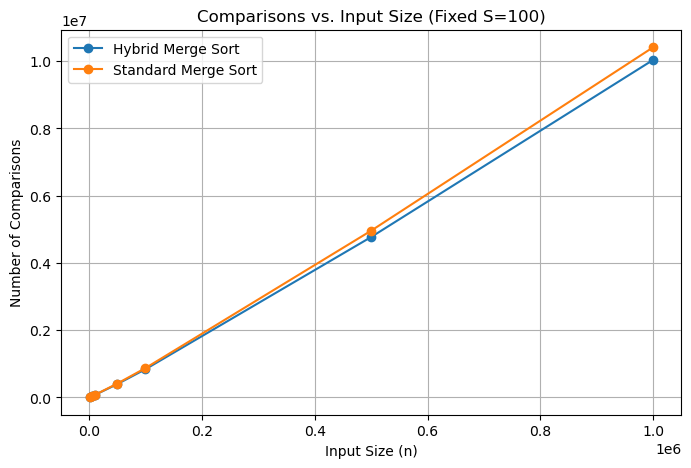

In [20]:
# Plot 1: Comparisons vs. Input Size (Fixed S)
plt.figure(figsize=(8, 5))
df_fixed_S = df[(df["S"] == 4) & (df["algorithm"] == "Hybrid Merge Sort")]
plt.plot(df_fixed_S["n"], df_fixed_S["comparisons"], marker='o', linestyle='-', label="Hybrid Merge Sort")
df_standard = df[df["algorithm"] == "Standard Merge Sort"]
plt.plot(df_standard["n"], df_standard["comparisons"], marker='o', linestyle='-', label="Standard Merge Sort")
plt.xlabel("Input Size (n)")
plt.ylabel("Number of Comparisons")
plt.title("Comparisons vs. Input Size (Fixed S=100)")
plt.legend()
plt.grid(True)
plt.show()